# Analiza eksploracyjna

09.01.2020
<br>
Aleksei Haidukevich, Joanna Smolska

Wczytanie niezbędnych pakietów.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Wczytanie danych i wyświetlenie pierwszych pięciu wierszy.

In [29]:
df = pd.read_excel('../data/main.xlsx', header=0)
df.head(5)

,country,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
0,Austria,8858775,39.7,10.4,18.40,71.4,39.6,21.688730,1500.00,0.1
1,Belgium,11467923,21.2,18.0,20.55,74.5,48.2,19.798485,1501.82,1.8
2,Bulgaria,7000039,9.5,13.0,6.68,66.4,33.4,40.456639,184.07,1.9
3,Croatia,4076246,16.5,11.2,9.02,60.7,37.9,25.021464,395.61,1.4
4,Cyprus,875898,22.4,30.2,8.85,76.3,22.4,39.968136,870.00,1.4


## Podstawowe informacje i miary dla analizowanych danych:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
country                        33 non-null object
population                     33 non-null int64
happiness                      33 non-null float64
bad_conditions                 33 non-null float64
culture                        33 non-null float64
health_estimate                33 non-null float64
commute                        33 non-null float64
education_underachievements    33 non-null float64
minimum_wage                   33 non-null float64
unmet_medical_needs            33 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 2.7+ KB


In [31]:
df.describe()

,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
count,3.300000e+01,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,1.868718e+07,25.690909,15.118182,15.806061,67.596970,40.256061,23.497954,956.064242,2.742424
std,2.505448e+07,10.182472,7.310030,7.050614,9.260551,7.137622,8.852588,804.847817,3.190320
min,3.569910e+05,7.500000,4.600000,4.400000,44.100000,22.400000,10.146950,0.000000,0.100000
25%,4.076246e+06,18.000000,10.400000,9.320000,61.600000,35.700000,17.749614,360.000000,0.800000
50%,8.542323e+06,24.600000,13.400000,15.700000,68.700000,39.600000,21.459401,720.460000,1.900000
75%,1.728216e+07,35.000000,18.000000,20.400000,74.500000,45.200000,27.153221,1461.850000,3.300000
max,8.301921e+07,43.200000,38.100000,30.850000,83.600000,52.500000,45.060331,3200.000000,16.400000


Kraje, dla których dokonywana będzie analiza:

In [32]:
df['country']

0            Austria
1            Belgium
2           Bulgaria
3            Croatia
4             Cyprus
5            Czechia
6            Denmark
7            Estonia
8            Finland
9             France
10           Germany
11            Greece
12           Hungary
13           Iceland
14           Ireland
15             Italy
16            Latvia
17         Lithuania
18        Luxembourg
19             Malta
20       Netherlands
21            Norway
22            Poland
23          Portugal
24           Romania
25            Serbia
26          Slovakia
27          Slovenia
28             Spain
29            Sweden
30       Switzerland
31            Turkey
32    United Kingdom
Name: country, dtype: object

## Wizualizacja rozkładu danych

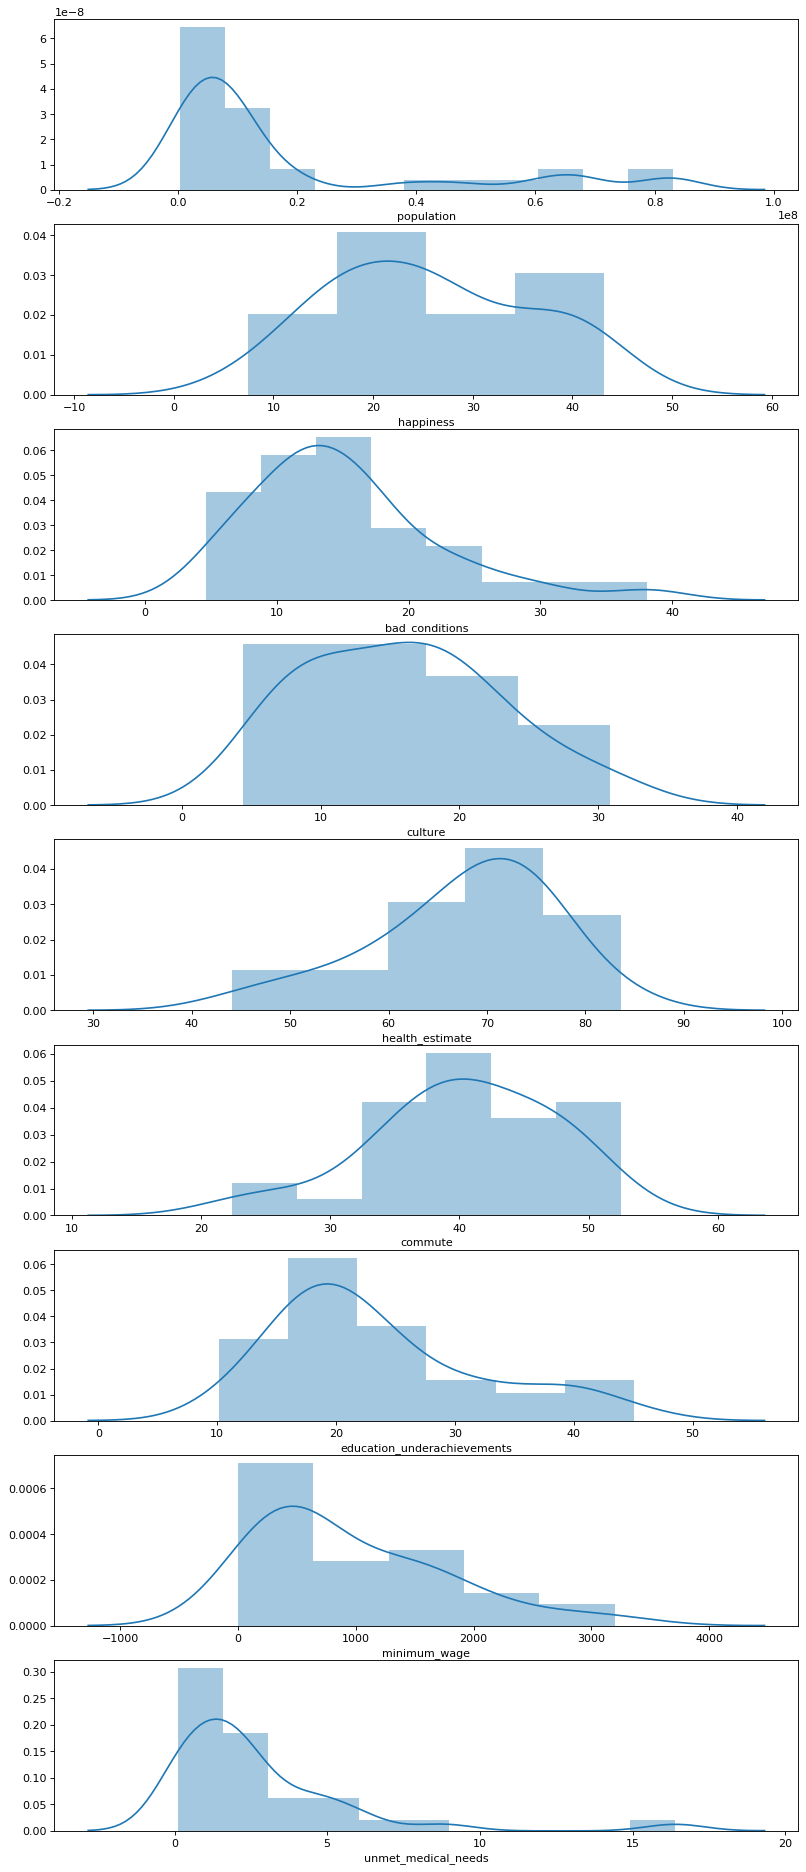

In [37]:
plt.figure(figsize=(12,30), dpi= 80)
i = 1
for col in df.columns.drop("country"):
    plt.subplot(9,1,i)
    i = i + 1
    sns.distplot(df.loc[:, col])

## Tablica korelacji poszczególnych cech:

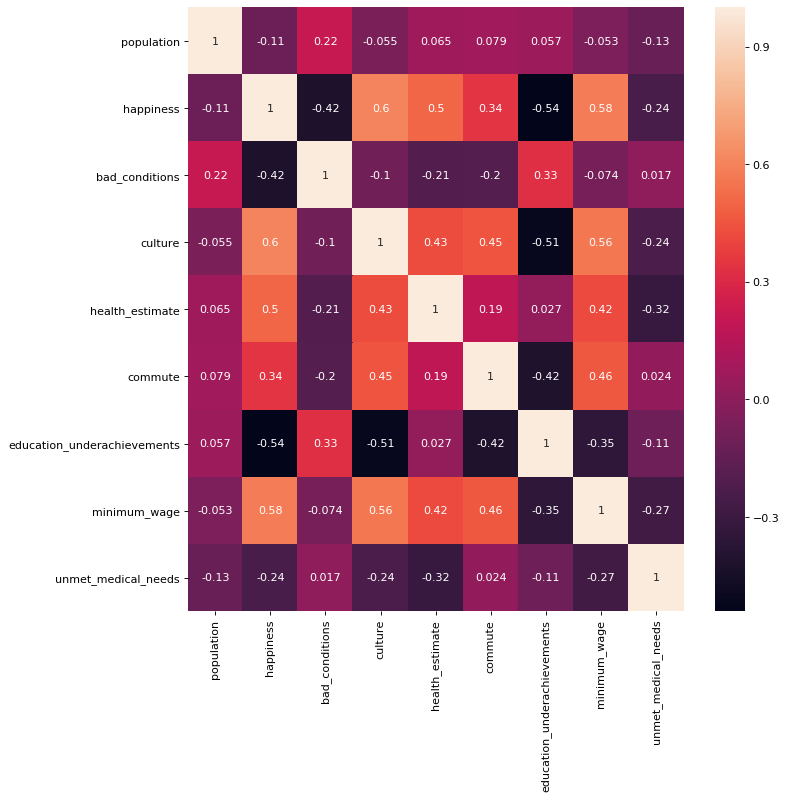

In [33]:
plt.figure(figsize=(10,10),dpi = 80)
sns.heatmap(df.corr(),annot = df.corr())

Z powyższej tablicy korelacji wyciągnąć można następujące wnioski:
<br> - poziom deklarowanego szczęścia jest silnie ujemnie skorelowany ze złymi warunkami mieszkalnymi (bad_conditions)
<br> - poziom deklarowanego szczęścia jest silnie dodatnio skorelowany z aktywnością kulturalną (culture)
<br> - poziom deklarowanego szczęścia jest silnie dodatnio skorelowany z dobrym stanem zdrowia (health_estimate)
<br> - poziom deklarowanego szczęścia jest dość mocno dodatnio skorelowany z czasem poświęconym na dojazdy (commute)
<br> - poziom deklarowanego szczęścia jest silnie ujemnie skorelowany z brakami w wykształceniu (education_underachievements)
<br> - poziom deklarowanego szczęścia jest silnie dodatnio skorelowany z wysokością płacy minimalnej (minimum_wage)
<br><br> Ponadto, poziom deklarowanego szczęścia nie jest skorelowany z populacją oraz jest słabo ujemnie skorelowany z częstością braku satysfakcjonującej opieki zdrowotnej.

## Zadanie badawcze

Zadanie badawcze opiera się na wyznaczeniu takiego modelu regresji, dla którego na podstawie wskazania wartości atrybutów mówiących o edukacji, aktywności kulturalnej, czy płacy minimalnej, wyestymowany będzie poziom deklarowanego szczęścia w danym k